In [1]:
import  xarray  as  xr
import  matplotlib.pyplot  as plt
import glob
import cartopy.crs as ccrs
import numpy as np
import netCDF4

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


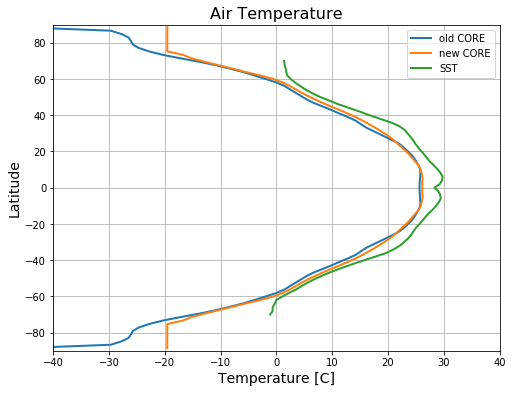

<xarray.DataArray 'tos' (time: 360, yh: 81, xh: 180)>
[5248800 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * yh       (yh) float64 -80.0 -78.0 -76.0 -74.0 -72.0 ... 74.0 76.0 78.0 80.0
  * time     (time) object 2650-01-16 12:00:00 ... 2679-12-16 12:00:00
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [9]:
# # import data from coupled model
# ds1 = xr.open_dataset('/data2/darr/MOM6_cases/aquaplanet/coupled-ngrid/ZOUT/190yr-out/01510101.flux_month.nc', decode_times=False)
# t_surf = np.nanmean(ds1['t_surf'][9:-2,:,:], axis=0)
# tc_air = np.nanmean(ds1['t_atm'][9:-2,:,:], axis=0)

# import data from symmetrized CORE files
ds2 = xr.open_dataset('/data2/sragen/CORE/CORE_old/t_10_mod.clim.nc')
tsz_air = np.nanmean(ds2['T_10'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('/data2/sragen/CORE_new/t_10.15JUNE2009.nc')
tnew_air = np.nanmean(ds3['T_10'], axis=0)

# path to ocean_month file
path_month = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/salt_restore/780yr_no_salt_restore/26500101.ocean_month.nc'
dm_ns = xr.open_dataset(path_month, decode_times=True)
t_ns = np.nanmean(dm_ns['tos'][-11:,:,:], axis=0)

# b = np.linspace(-50, 30, 21)
# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
# ax.set_global()
# plt.contourf(ds3['LON'], ds3['LAT'], tnew_air-273.15, b, extend='both', cmap='magma', transform=ccrs.PlateCarree())
# plt.title('New CORE Forcing Air Temperature [C]')
# cbar = plt.colorbar(boundaries=b)
# plt.show()

# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
# ax.set_global()
# plt.contourf(ds3['LON'], ds3['LAT'], tsz_air-273.15, b, extend='both', cmap='magma', transform=ccrs.PlateCarree())
# plt.title('Old CORE Forcing Air Temperature [C]')
# cbar = plt.colorbar(boundaries=b)
# plt.show()

plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(tsz_air, axis=1)-273.15, ds2['LAT'], linewidth=2, label='old CORE')
#plt.plot(np.nanmean(tc_air, axis=1)-273.15, ds1['lat'], linewidth=2, label='Coupled Model')
plt.plot(np.nanmean(tnew_air, axis=1)-273.15, ds3['LAT'], linewidth=2, label='new CORE')
plt.plot(np.nanmean(t_ns, axis=1), dm_ns['yh'], linewidth=2, label='SST')
plt.ylim(-90,90), plt.xlim(-40,40)
plt.title('Air Temperature', fontsize=16)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Temperature [C]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

dm_ns['tos']

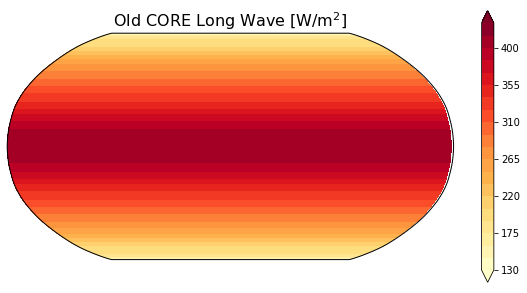

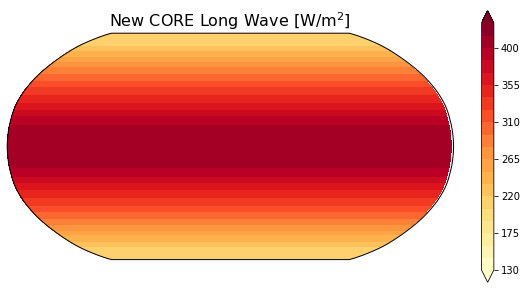

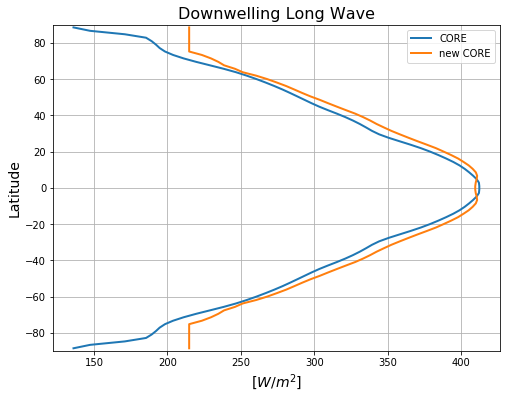

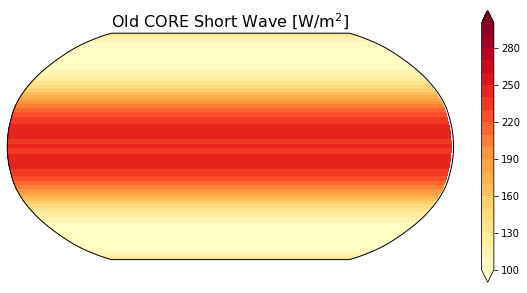

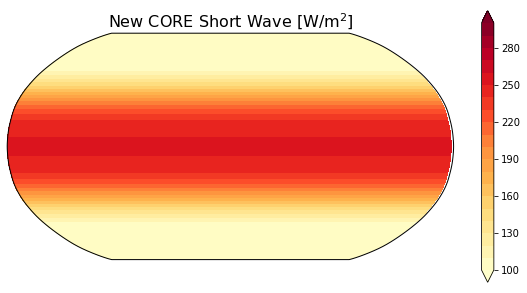

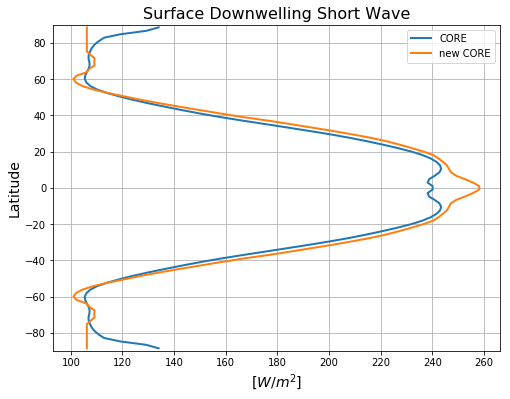

In [4]:
# import data from coupled model
ds1 = xr.open_dataset('/data2/darr/MOM6_cases/aquaplanet/coupled-ngrid/ZOUT/190yr-out/01510101.flux_month.nc', decode_times=False)
lwflx = np.nanmean(ds1['lwflx'][9:-2,:,:], axis=0)

# import data from symmetrized CORE files
ds2 = xr.open_dataset('CORE_SZ/ncar_rad.clim.nc')
LWDN_sz = np.nanmean(ds2['LWDN'], axis=0)
SWDN_sz = np.nanmean(ds2['SWDN'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/ncar_rad.15JUNE2009.nc')
LWDN = np.nanmean(ds3['LWDN'][:], axis=0)
SWDN = np.nanmean(ds3['SWDN'][:], axis=0)

# plots
# Long Wave map
b = np.linspace(130, 430, 21)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], LWDN_sz, b, extend='both', cmap='YlOrRd', transform=ccrs.PlateCarree())
plt.title('Old CORE Long Wave [W/m$^2$]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], LWDN, b, extend='both', cmap='YlOrRd', transform=ccrs.PlateCarree())
plt.title('New CORE Long Wave [W/m$^2$]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# Long Wave plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(LWDN_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(LWDN, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Downwelling Long Wave', fontsize=16)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('[$W/m^2$]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Short Wave map
b = np.linspace(100, 300, 21)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], SWDN_sz, b, extend='both', cmap='YlOrRd', transform=ccrs.PlateCarree())
plt.title('Old CORE Short Wave [W/m$^2$]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], SWDN, b, extend='both', cmap='YlOrRd', transform=ccrs.PlateCarree())
plt.title('New CORE Short Wave [W/m$^2$]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# short Wave plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(SWDN_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(SWDN, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Surface Downwelling Short Wave', fontsize=16)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('[$W/m^2$]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

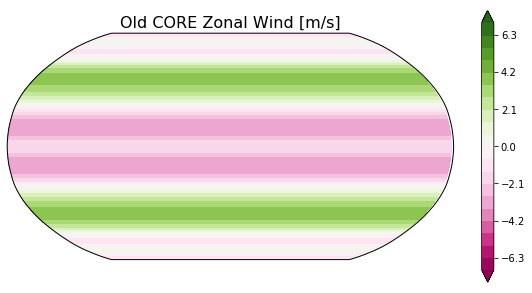

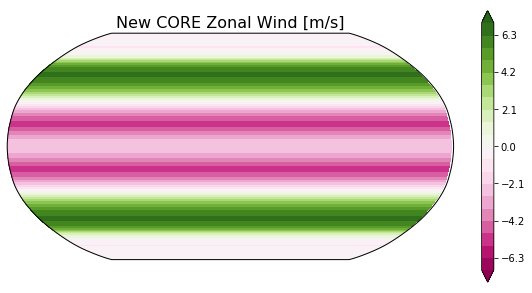

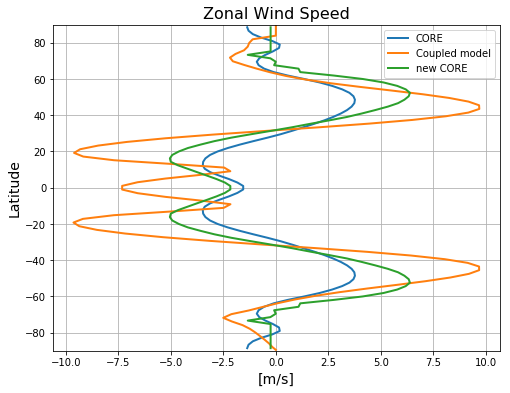

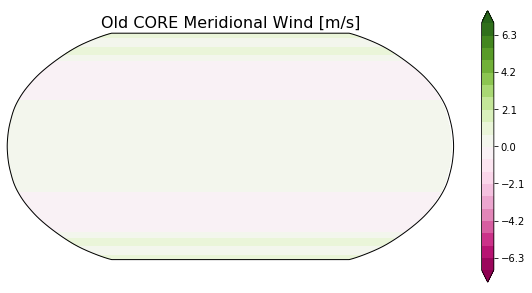

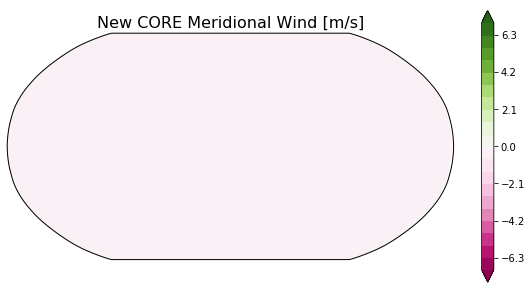

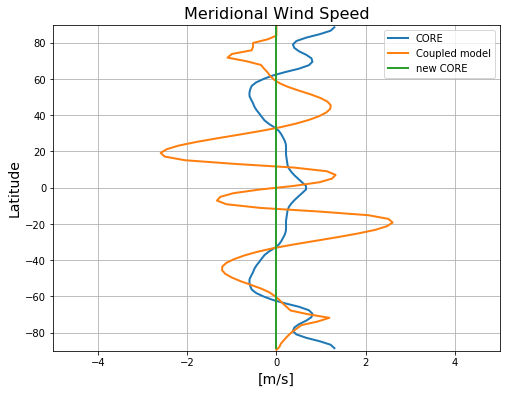

In [5]:
# import data from coupled model
ds1 = xr.open_dataset('/data2/darr/MOM6_cases/aquaplanet/coupled-ngrid/ZOUT/190yr-out/01510101.flux_month.nc', decode_times=False)
u_atm = np.nanmean(ds1['u_atm'][9:-2,:,:], axis=0)
v_atm = np.nanmean(ds1['v_atm'][9:-2,:,:], axis=0)

# import data from symmetrized CORE files
ds2 = xr.open_dataset('CORE_SZ/u_10_mod.clim.nc')
U_10_sz = np.nanmean(ds2['U_10'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/u_10.15JUNE2009.nc')
U_10 = np.nanmean(ds3['U_10'][:], axis=0)

# plots
# zonal wind map U_10
b = np.linspace(-7, 7 ,21)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], U_10_sz, b, extend='both', cmap='PiYG', transform=ccrs.PlateCarree())
plt.title('Old CORE Zonal Wind [m/s]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], U_10, b, extend='both', cmap='PiYG', transform=ccrs.PlateCarree())
plt.title('New CORE Zonal Wind [m/s]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# zonal wind plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(U_10_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(u_atm, axis=1), ds1['lat'], linewidth=2, label='Coupled model')
plt.plot(np.nanmean(U_10, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Zonal Wind Speed', fontsize=16)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('[m/s]', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# import data from symmetrized CORE files
ds2 = xr.open_dataset('CORE_SZ/v_10_mod.clim.nc')
V_10_sz = np.nanmean(ds2['V_10'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/v_10.15JUNE2009.nc')
V_10 = np.nanmean(ds3['V_10'][:], axis=0)

# plots
# meridional wind map V_10
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], V_10_sz, b, extend='both', cmap='PiYG', transform=ccrs.PlateCarree())
plt.title('Old CORE Meridional Wind [m/s]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], V_10, b, extend='both', cmap='PiYG', transform=ccrs.PlateCarree())
plt.title('New CORE Meridional Wind [m/s]', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# meridional wind plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(V_10_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(v_atm, axis=1), ds1['lat'], linewidth=2, label='Coupled model')
plt.plot(np.nanmean(V_10, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90), plt.xlim(-5, 5)
plt.title('Meridional Wind Speed', fontsize=16)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('[m/s]', fontsize=14)
plt.grid()
plt.legend()
plt.show()


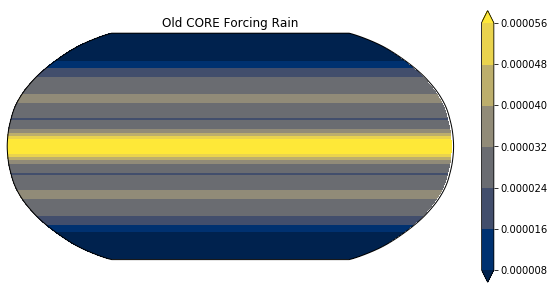

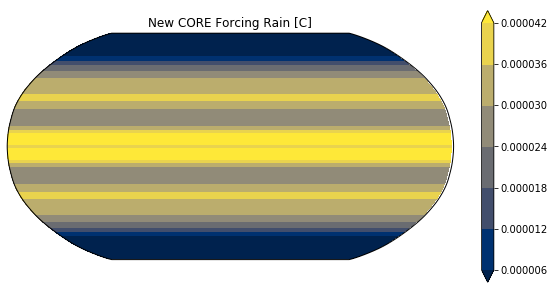

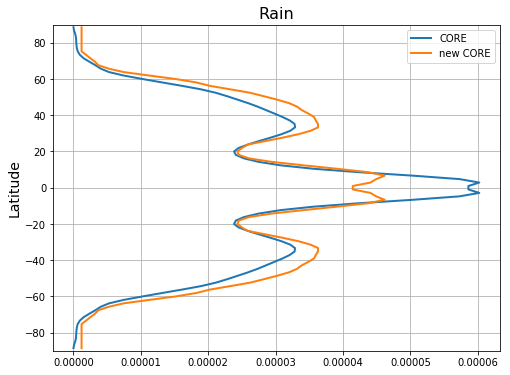

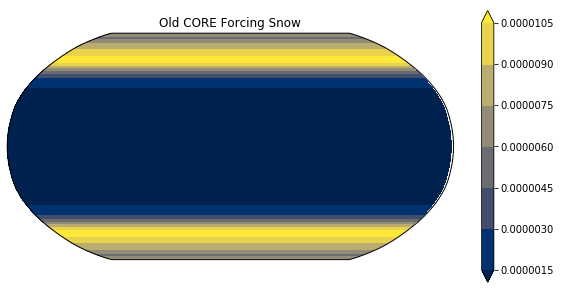

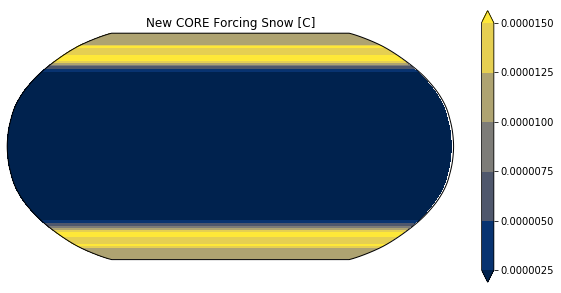

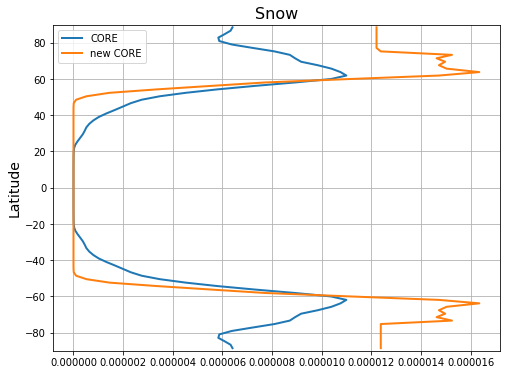

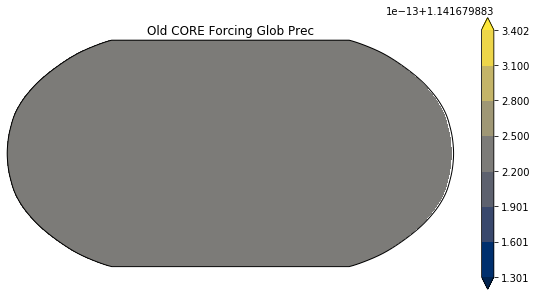

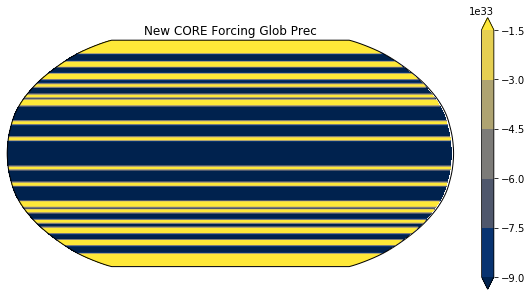

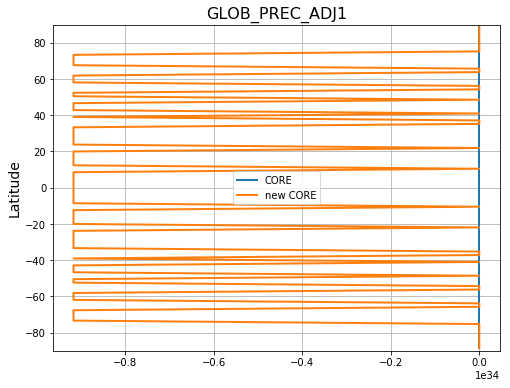

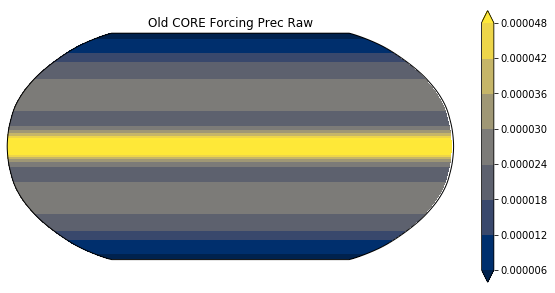

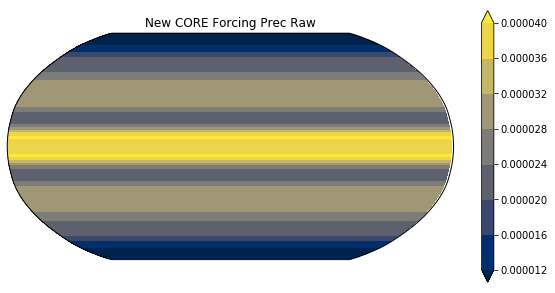

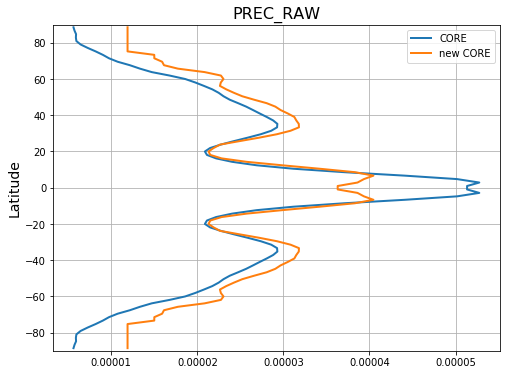

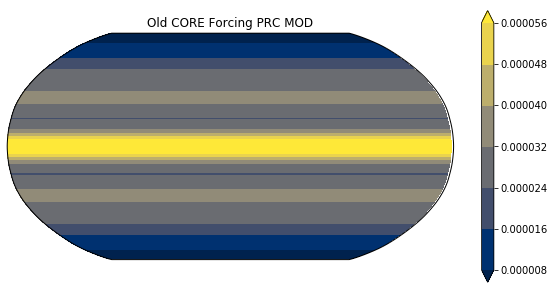

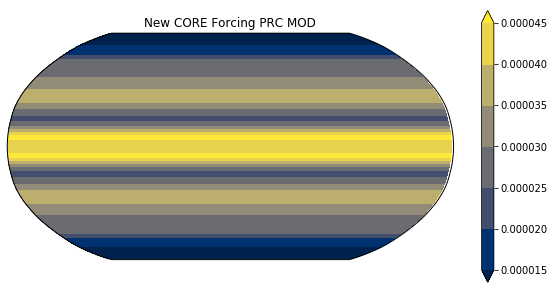

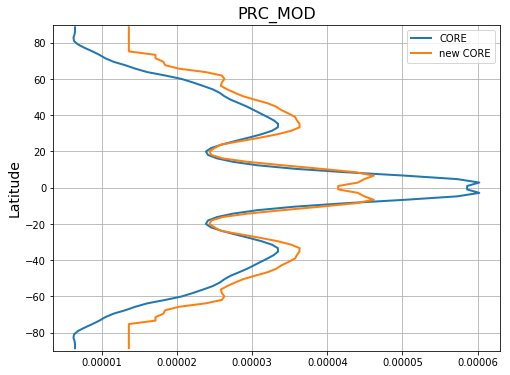

In [12]:
# import data from symmetrized CORE files
ds2 = xr.open_dataset('CORE_SZ/ncar_precip.clim.nc')
rain_sz = np.nanmean(ds2['RAIN'], axis=0)
snow_sz = np.nanmean(ds2['SNOW'], axis=0)
glob_prec_adj1_sz = np.nanmean(ds2['GLOB_PREC_ADJ1'], axis=0)
prec_raw_sz = np.nanmean(ds2['PREC_RAW'], axis=0)
prc_mod_sz = np.nanmean(ds2['PRC_MOD'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/ncar_precip.15JUNE2009.nc')
rain = np.nanmean(ds3['RAIN'], axis=0)
snow = np.nanmean(ds3['SNOW'], axis=0)
glob_prec_adj1 = np.nanmean(ds3['GLOB_PREC_ADJ1'], axis=0)
prec_raw = np.nanmean(ds3['PREC_RAW'], axis=0)
prc_mod = np.nanmean(ds3['PRC_MOD'], axis=0)

# Rain maps
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], rain_sz, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Old CORE Forcing Rain')
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], rain, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('New CORE Forcing Rain [C]')
cbar = plt.colorbar()
plt.show()

# Rain plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(rain_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(rain, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Rain', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Snow maps
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], snow_sz, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Old CORE Forcing Snow')
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], snow, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('New CORE Forcing Snow [C]')
cbar = plt.colorbar()
plt.show()

# Snow plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(snow_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(snow, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Snow', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Global Precip maps
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], glob_prec_adj1_sz, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Old CORE Forcing Glob Prec')
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], glob_prec_adj1, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('New CORE Forcing Glob Prec')
cbar = plt.colorbar()
plt.show()

# Global Precip plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(glob_prec_adj1_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(glob_prec_adj1, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('GLOB_PREC_ADJ1', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Prec Raw maps
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], prec_raw_sz, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Old CORE Forcing Prec Raw')
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], prec_raw, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('New CORE Forcing Prec Raw')
cbar = plt.colorbar()
plt.show()

# Prec Raw plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(prec_raw_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(prec_raw, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('PREC_RAW', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Prc Mod maps
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], prc_mod_sz, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('Old CORE Forcing PRC MOD')
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], prc_mod, extend='both', cmap='cividis', transform=ccrs.PlateCarree())
plt.title('New CORE Forcing PRC MOD')
cbar = plt.colorbar()
plt.show()

# Prc Mod plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(prc_mod_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(prc_mod, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('PRC_MOD', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

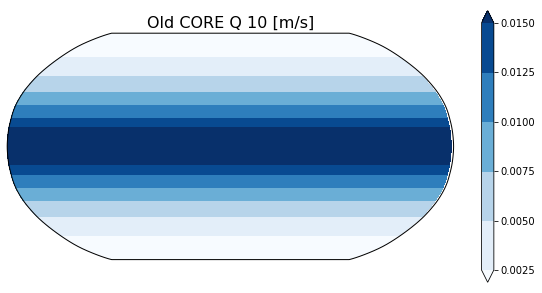

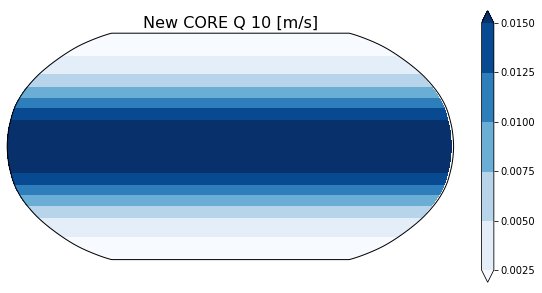

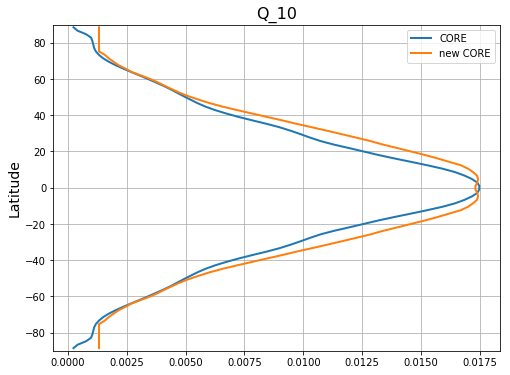

In [13]:
# import data from old CORE files
ds2 = xr.open_dataset('CORE_SZ/q_10_mod.clim.nc')
q_10_sz = np.nanmean(ds2['Q_10'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/q_10.15JUNE2009.nc')
q_10 = np.nanmean(ds3['Q_10'][:], axis=0)

# plots
# Q_10 Map
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], q_10_sz, extend='both', cmap='Blues', transform=ccrs.PlateCarree())
plt.title('Old CORE Q 10', fontsize=16)
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], q_10, extend='both', cmap='Blues', transform=ccrs.PlateCarree())
plt.title('New CORE Q 10', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# zonal wind plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(q_10_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(q_10, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('Q_10', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

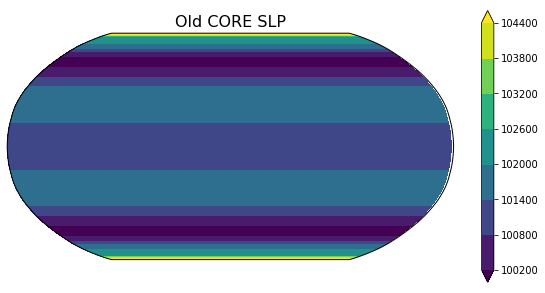

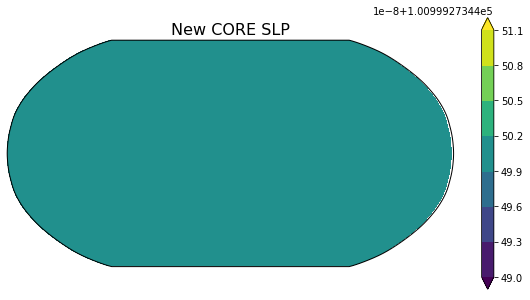

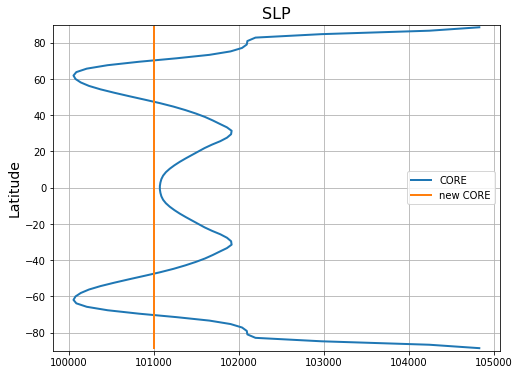

In [15]:
# import data from old CORE files
ds2 = xr.open_dataset('CORE_SZ/slp.clim.nc')
slp_sz = np.nanmean(ds2['SLP'], axis=0)

# import data from new CORE files
ds3 = xr.open_dataset('CORE_new/slp.15JUNE2009.nc')
slp = np.nanmean(ds3['SLP'][:], axis=0)

# plots
# slp Map
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], slp_sz, extend='both', transform=ccrs.PlateCarree())
plt.title('Old CORE SLP', fontsize=16)
cbar = plt.colorbar()
plt.show()

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
plt.contourf(ds3['LON'], ds3['LAT'], slp, extend='both', transform=ccrs.PlateCarree())
plt.title('New CORE SLP', fontsize=16)
cbar = plt.colorbar(boundaries=b)
plt.show()

# slp plot
plt.subplots(figsize=(8,6))
plt.plot(np.nanmean(slp_sz, axis=1), ds2['LAT'], linewidth=2, label='CORE')
plt.plot(np.nanmean(slp, axis=1), ds3['LAT'], linewidth=2, label='new CORE')
plt.ylim(-90,90)
plt.title('SLP', fontsize=16)
plt.ylabel('Latitude', fontsize=14)
plt.grid()
plt.legend()
plt.show()

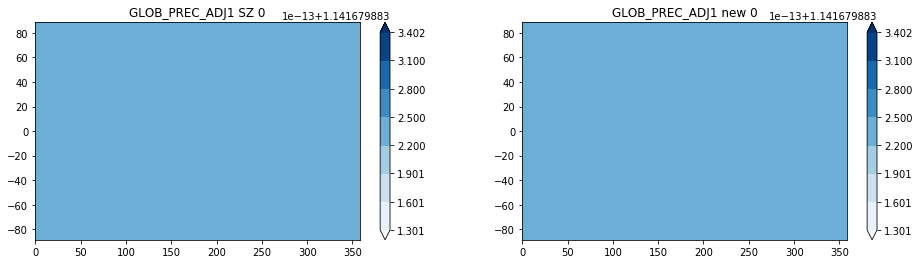

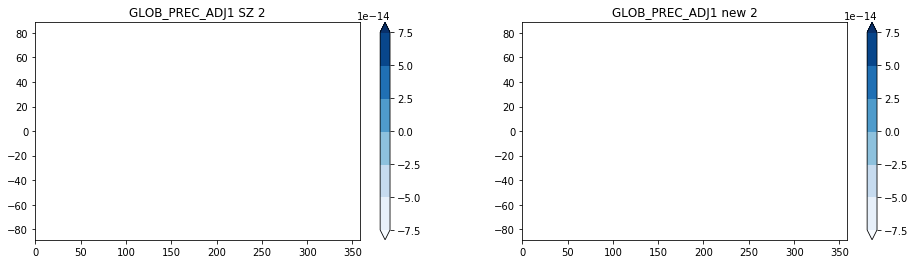

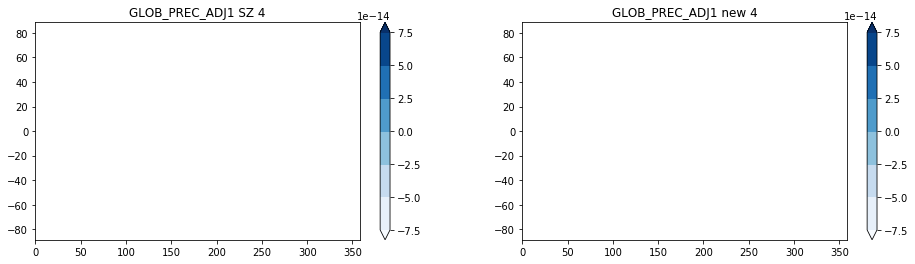

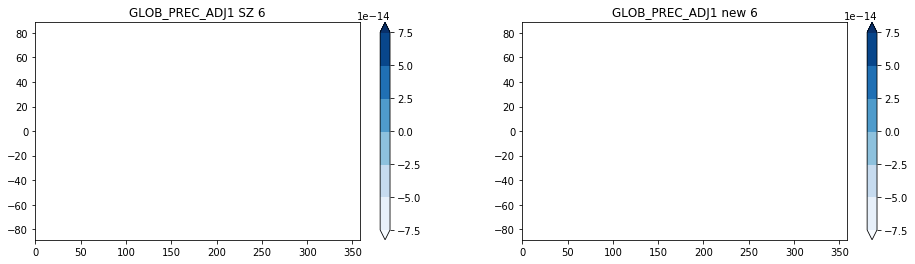

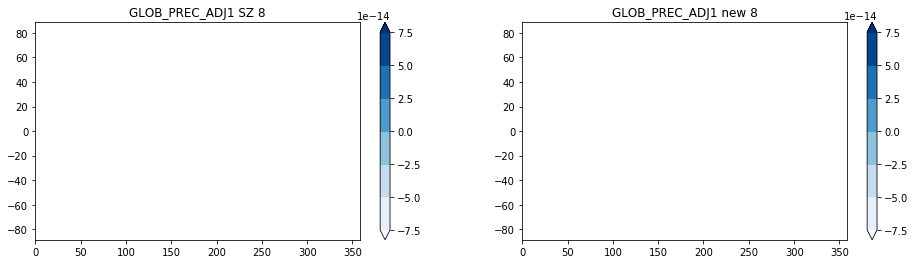

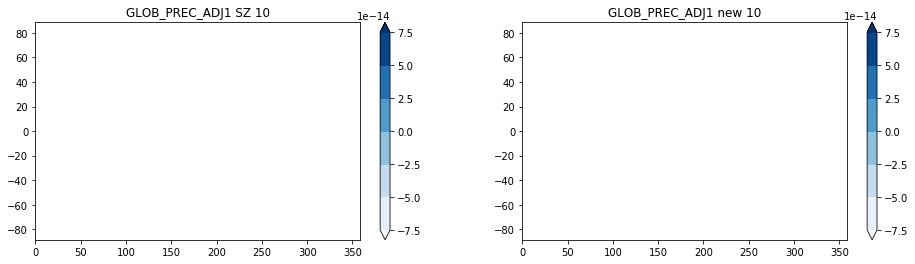

In [16]:
f = xr.open_dataset('CORE_SZ/ncar_precip.clim.nc')
f1 = xr.open_dataset('CORE_new/ncar_precip.15JUNE2009.nc')

lon = np.asarray(f['LON'][:])
lat = np.asarray(f['LAT'][:])
time = np.asarray(f['TIME'][:])
gpa = np.asarray(f['GLOB_PREC_ADJ1'][:])
gpa_new = np.asarray(f['GLOB_PREC_ADJ1'][:])

cmap = plt.get_cmap('Blues')

for i in range(0, len(time), 2):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,4))
    im0 = ax0.contourf(lon, lat, gpa[i,:,:], cmap=cmap, extend='both')
    im1 = ax1.contourf(lon, lat, gpa_new[i,:,:], cmap=cmap, extend='both')
    ax0.set_title('GLOB_PREC_ADJ1 SZ {0}'.format(i))
    ax1.set_title('GLOB_PREC_ADJ1 new {0}'.format(i))
    fig.colorbar(im0, ax=ax0)
    fig.colorbar(im1, ax=ax1)
    plt.show(block=False)
    
# fig, ax = plt.subplots()
# for i in range(0, len(time)):
#     plt.plot(lat, np.nanmean(gpa[i,:,:], axis=1))
#     plt.title('GLOB_PREC')
# plt.show()

In [8]:
ls CORE_SZ/

ncar_precip.clim.nc*  q_10_mod.clim.nc*  t_10_mod.clim.nc*  v_10_mod.clim.nc*
ncar_rad.clim.nc*     slp.clim.nc*       u_10_mod.clim.nc*
